# Análise e Classificação de Faces: Visão Computacional com OpenCv

In [ ]:
#conda install -c conda-forge opencv
#conda install -c conda-forge dlib

In [1]:
import cv2
import dlib
import matplotlib.pyplot as plt
import seaborn as sns

## Analisando os canais de cor de uma imagem:

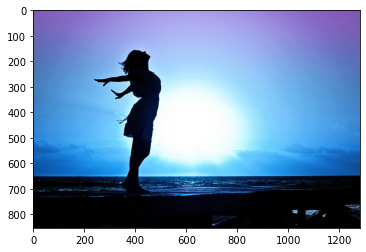

In [2]:
# Abrindo uma imagem utilizando o opencv:

imagem = cv2.imread('images/px-girl.jpg')

plt.imshow(imagem)

### O opencv utiliza, por padrão, imagens em BGR (blue-green-red). 

### Note que a leitura da imagem foi feita pelo OpenCv e a visualização da imagem foi viabilizada pelo matplotlib, que utiliza o padrão RGB (red-blue-green)

### É necessária, portanto, uma conversão antes da plotagem.

In [3]:
# Convertendo uma imagem BGR para RGB:

imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

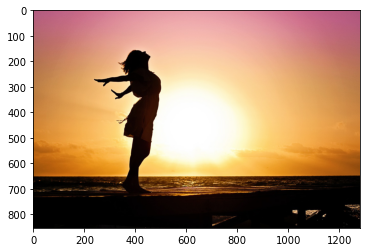

In [4]:
# Plotando novamente:

plt.imshow(imagem_rgb)

In [5]:
# Detalhes da imagem:

print('Shape: ', imagem_rgb.shape)
print(f'pixels: {imagem_rgb.shape[:2]}, canais de cor: {imagem_rgb.shape[2]}')

Shape:  (853, 1280, 3)
pixels: (853, 1280), canais de cor: 3


In [6]:
# Convertendo a imagem para a escala de cinzas:

imagem_cinza = cv2.cvtColor(imagem_rgb, cv2.COLOR_RGB2GRAY)

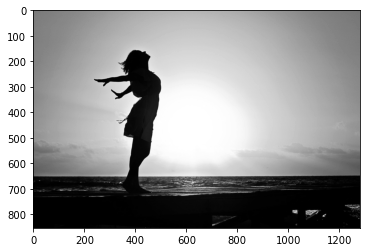

In [7]:
plt.imshow(imagem_cinza, cmap = 'gray')

In [8]:
# Note que a imagem em tons de cinza tem apenas 1 canal:

imagem_cinza.shape

(853, 1280)

## Região de interesse (RoI - Region of Interest):

In [9]:
# Abrindo e convertendo outra imagem:

imagem = cv2.imread('images/px-people.jpg')
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

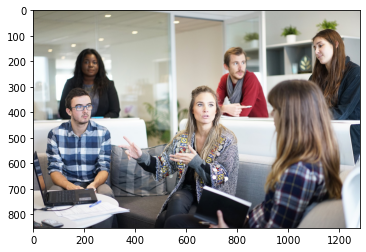

In [10]:
plt.imshow(imagem)

#### Sabemos que uma imagem é uma matriz. Neste caso, uma matriz de (853 x 1280) pixels.

#### Suponha que desejemos selecionar, como regiao de interesse, o rosto da pessoa de pé no canto direito superior.

#### Vamos "chutar" que ela esteja, mais ou menos, entre as posições (100:200 e 1000:1200).

In [11]:
imagem_roi = imagem[100:200, 1000:1200]

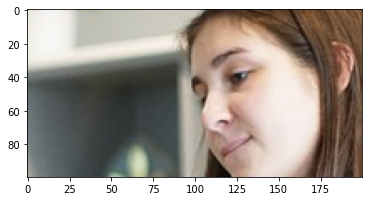

In [12]:
plt.imshow(imagem_roi)

#### Esta é uma extração manual.

In [13]:
# Para salvar essa extração:

# Converter novamente para BGR:
imagem_roi_bgr = cv2.cvtColor(imagem_roi, cv2.COLOR_RGB2BGR)

# Salvar a imagem:
cv2.imwrite('images/imagem_roi_bgr.png', imagem_roi_bgr)

True

***

### Exercício:

* Identificar o corpo da pessoa manualmente
* Converter a RoI em escala de cinza
* Incluir a RoI novamente na imagem colorida

In [14]:
# Leitura da imagem e conversão de BGR para RGB:

imagem_exer = cv2.imread('images/girl.png')

imagem_exer_rgb = cv2.cvtColor(imagem_exer, cv2.COLOR_BGR2RGB)

Text(0.5, 1.0, 'Imagem inteira em RGB COLORIDA - GAROTA')

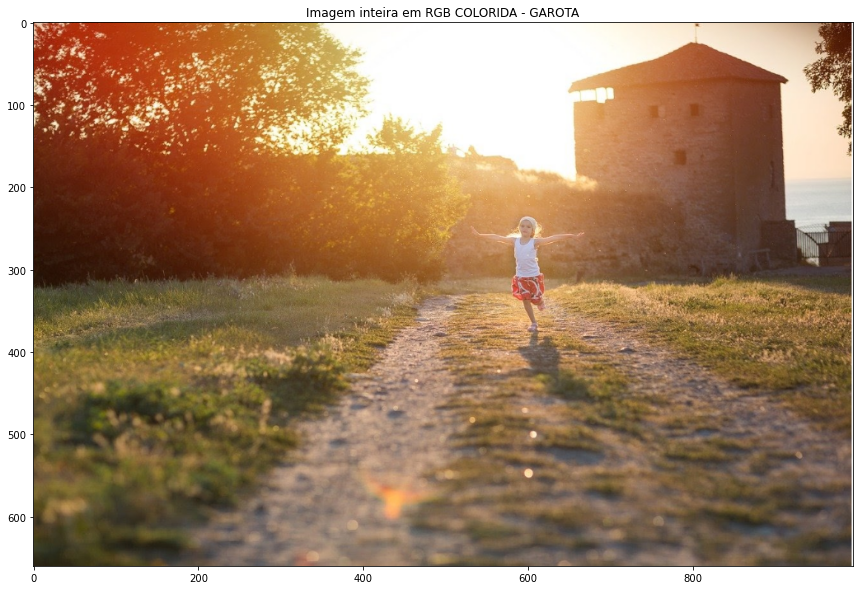

In [15]:
plt.figure(figsize = (20,10))
plt.imshow(imagem_exer_rgb)
plt.title('Imagem inteira em RGB COLORIDA - GAROTA')

In [16]:
# RoI:

imagem_exer_roi = imagem_exer_rgb[225:380, 530:670]

Text(0.5, 1.0, 'RoI - GAROTA')

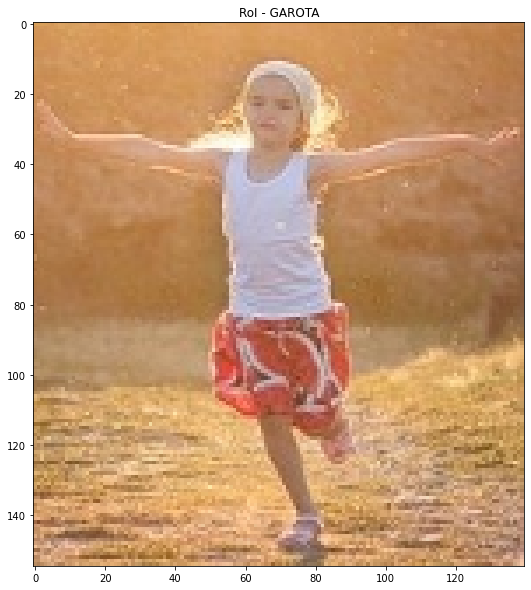

In [17]:
plt.figure(figsize = (20,10))
plt.imshow(imagem_exer_roi)
plt.title('RoI - GAROTA')

In [18]:


# Conversão para a escala de cinza:

imagem_exer_cinza = cv2.cvtColor(imagem_exer_roi, cv2.COLOR_RGB2GRAY)

Text(0.5, 1.0, 'RoI - GAROTA')

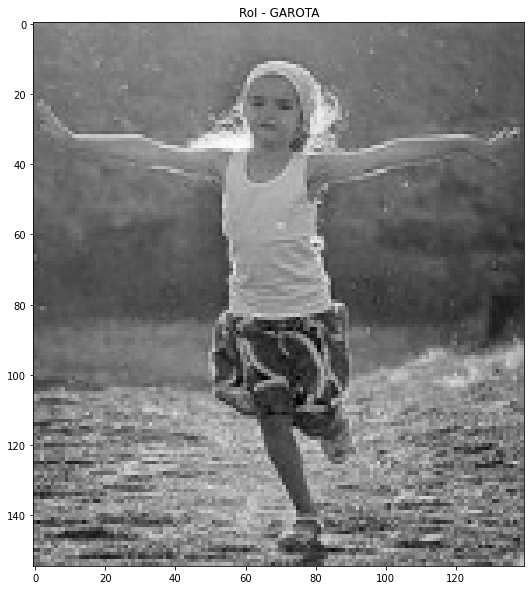

In [19]:
plt.figure(figsize = (20,10))
plt.imshow(imagem_exer_cinza, cmap = 'gray')
plt.title('RoI - GAROTA')

In [20]:
# Convertendo a foto em escala de cinza (apenas 1 canal de cor) para RGB:

imagem_cinza_rgb = cv2.cvtColor(imagem_exer_cinza, cv2.COLOR_GRAY2RGB)

In [21]:
imagem_exer_rgb[225:380, 530:670] = imagem_cinza_rgb

Text(0.5, 1.0, 'Corpo inteiro')

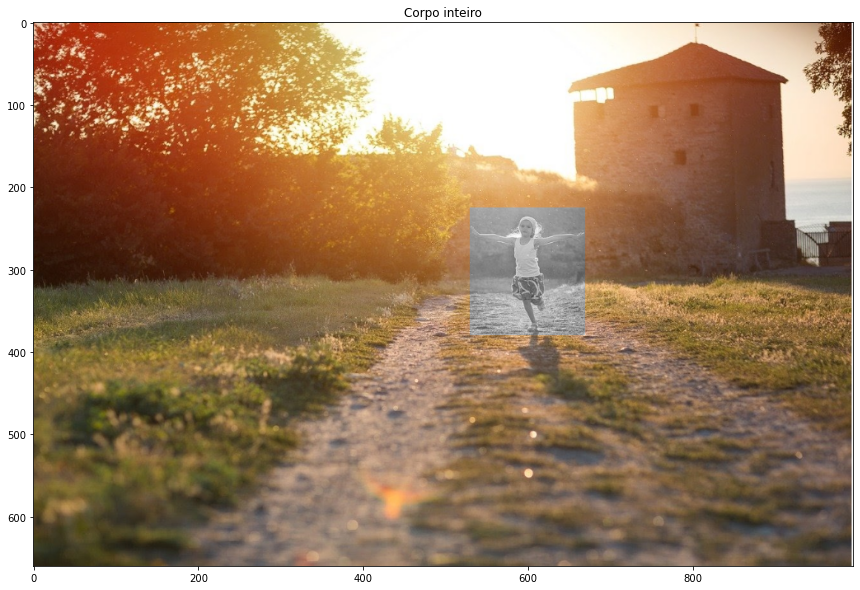

In [22]:
plt.figure(figsize=(20,10))
plt.imshow(imagem_exer_rgb)
plt.title("Corpo inteiro")

***

### Classificador de cascata de Haar:

In [23]:
# Abrindo a imagem e convertendo para RGB:

imagem = cv2.imread('images/px-people.jpg')
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

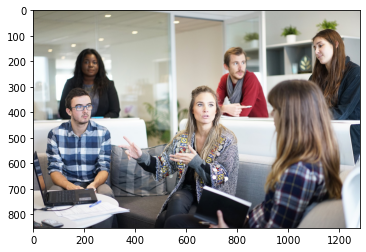

In [24]:
# Visualização:

plt.imshow(imagem)

#### O classificador de Haar trabalha com imagens em escala de cinza. É necessária, portanto, a conversão:

In [25]:
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_RGB2GRAY)

In [26]:
# Carregando o classificador especializado em rostos frontais:

classificador = cv2.CascadeClassifier('classificadores/haarcascade_frontalface_default.xml')

In [27]:
faces = classificador.detectMultiScale(imagem_cinza, 1.3, 5)

#### Parâmetros utilizados acima:

* 1.3: refere-se à escala. Dada uma imagem, ela será diminuída num processo chamado de piradimização.

* Para resolver a questão de escala nas imagens, existe um parâmetro do método de detecção (detectMultiScale) deste tipo de classificador, conhecido por scaleImage. Ele é capaz de redimensionar uma imagem maior até a dimensão definido no modelo. Por exemplo, se o valor deste parâmetro for 1.3, significa que a imagem a ser analisada será redimensionada (diminuir o tamanho) em 30% por etapa até alcançar a dimensão limite do modelo.

* 5: número mínimo de características vizinhas que o classificador vai considerar. Assim, o Haar Cascade tem uma condição que vai juntar uma série de características. Se essas características minimamente “setadas” nesse parâmetro, como por exemplo 5, que é o padrão, forem atingidas, ele vai separar aquela região dizendo que é um rosto.

In [28]:
# Quantidade de rostos identificados:

len(faces)

5

In [29]:
 # Visualizando uma das faces selecionadas automaticamente:
    
faces[0]

array([189, 176,  75,  75], dtype=int32)

#### Entendendo o array:

* x = 189, y = 176 : coordenadas
* 75 x 75 : dimensões

#### Assim sendo, temos as coordenadas de cada face identificada. Faremos uma cópia da imagem e serão desenhados retângulos com as coordenadas coletadas.

In [30]:
imagem_anotada = imagem.copy()

In [31]:
for (x, y, w, h) in faces:
    cv2.rectangle(imagem_anotada, (x,y), (x+w, y+ h), (255, 255, 0), 2)

#### Parâmetros (255, 255, 0) >> Cor amarela
#### Parâmetro 2: espessura

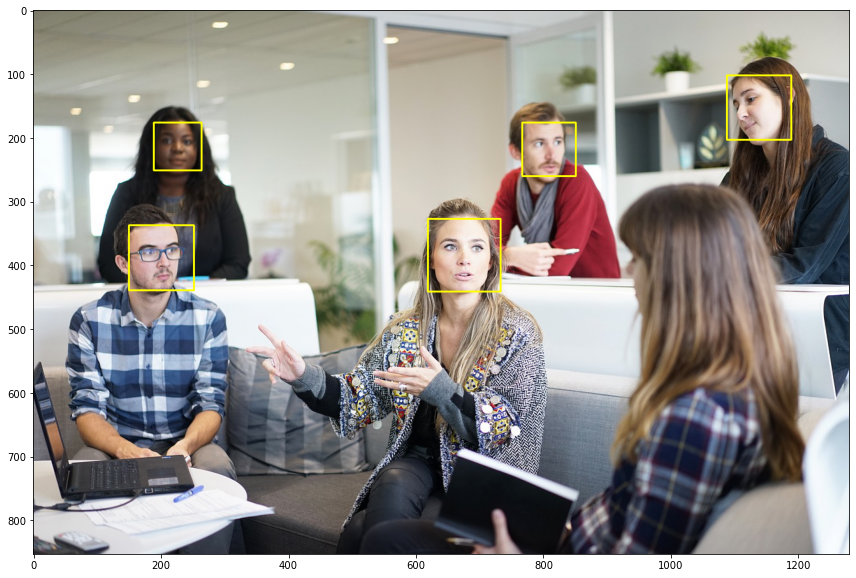

In [32]:
plt.figure(figsize = (20,10))
plt.imshow(imagem_anotada)

In [33]:
# Recortando e salvando as imagens das faces:

face_imagem = 0

for (x,y,w,h) in faces:
    face_imagem += 1
    imagem_roi = imagem[y:y+h, x:x+w]
    imagem_roi = cv2.cvtColor(imagem_roi, cv2.COLOR_RGB2BGR)
    cv2.imwrite('images/face_' + str(face_imagem) + '.png', imagem_roi)

***

### Exercício: Identificar, recortar e salvar o rosto da imagem abaixo:

In [34]:
# Abrindo a imagem e convertendo-a:

imagem_exer2 = cv2.imread('images/exer2.png')
imagem_exer2_rgb = cv2.cvtColor(imagem_exer2, cv2.COLOR_BGR2RGB)

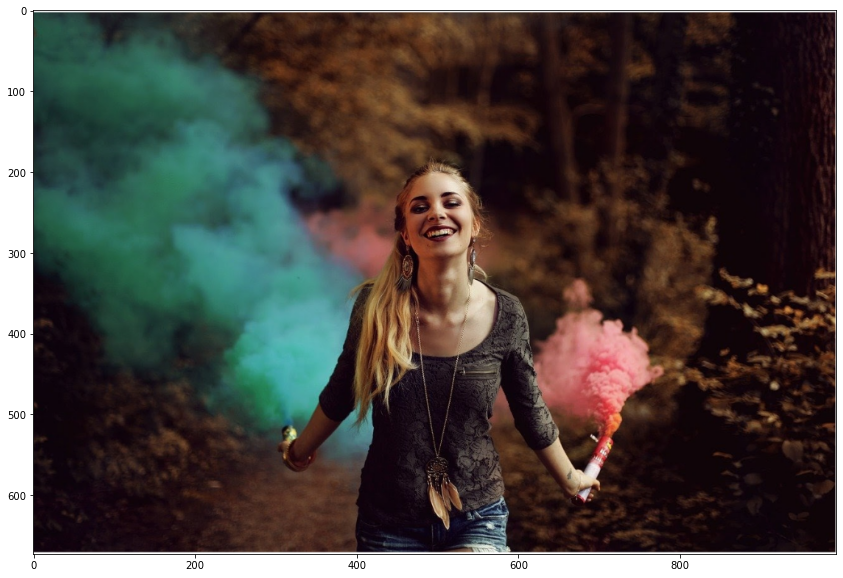

In [35]:
# Visualização:

plt.figure(figsize = (20,10))
plt.imshow(imagem_exer2_rgb)

In [36]:
# Conversão para a escala de cinza:

imagem_exer2_cinza = cv2.cvtColor(imagem_exer2_rgb, cv2.COLOR_RGB2GRAY)

In [37]:
# Utilizando o classificador para encontrar a face:

face_exer2 = classificador.detectMultiScale(imagem_exer2_cinza, 1.3, 5)

In [38]:
face_exer2

array([[449, 197, 100, 100]], dtype=int32)

In [39]:
# Criando uma copia da imagem para anotação:

imagem_exer2_anotada = imagem_exer2_rgb

In [40]:
imagem_exer2_anotada = cv2.rectangle(imagem_exer2_anotada, (449,197), (549, 297), (255, 255, 0), 2)

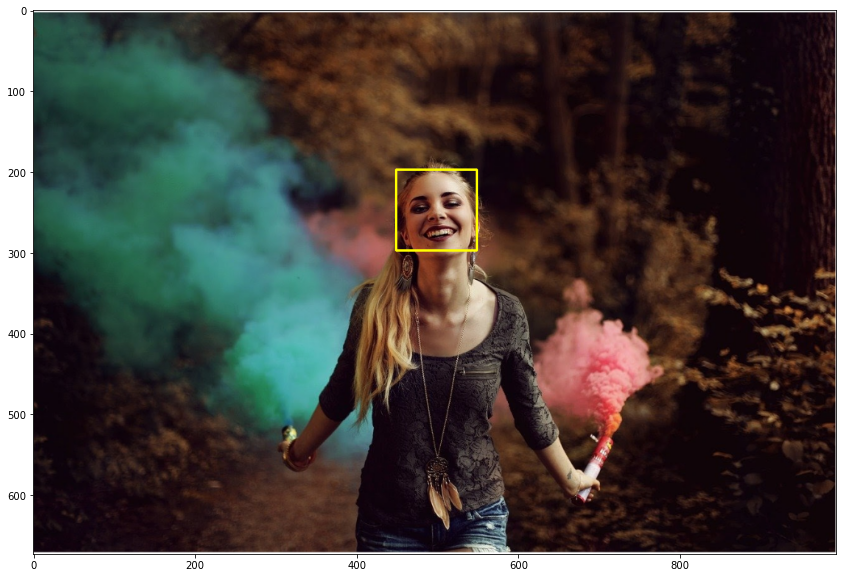

In [41]:
# Visualização:

plt.figure(figsize = (20,10))
plt.imshow(imagem_exer2_anotada)

In [43]:
# Salvando a imagem:

imagem_exer2_roi = imagem_exer2_rgb[197:297, 449:549 ]
imagem_exer2_roi = cv2.cvtColor(imagem_exer2_roi, cv2.COLOR_RGB2BGR)
cv2.imwrite('images/face_exer2.png', imagem_exer2_roi)

True

### Repositório de modelos de classificadores em cascata de Haar No repositório oficial do [OpenCV](https://github.com/opencv/opencv/tree/master/data/haarcascades) existe uma pasta com vários modelos já treinados para diferentes tipos de problemas, desde classificação de gatos até mesmo placas de automóveis russos.